In [179]:
# Packages
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Plot settings
sns.set_context('notebook') # optimises figures for notebook display
sns.set_style('ticks') # set default plot style
crayon = ['#4E79A7','#F28E2C','#E15759','#76B7B2','#59A14F', 
          '#EDC949','#AF7AA1','#FF9DA7','#9C755F','#BAB0AB']
sns.set_palette(crayon) # set custom color scheme
%matplotlib inline
plt.rcParams['figure.figsize'] = (9, 6)

In [3]:
# Methods
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

In [189]:
import string

In [4]:
train=pd.read_csv('train-1.csv')
test =pd.read_csv('test-1.csv')

In [6]:
# Response label
response = 'price'
predictors =  [variable for variable in train.columns if variable!=response] 

In [7]:
y_train = train[response].to_numpy()
X_train = train[predictors].to_numpy() ## all predictors

# Missing Value

In [243]:
missing=train.isnull().sum()
missing[train.isnull().sum()!=0].sort_values()

host_location                     12
zipcode                           36
beds                              73
neighbourhood                   1400
cleaning_fee_perc               2510
last_review                     2593
first_review                    2593
reviews_per_month               2593
space                           2842
review_scores_rating            2895
review_scores_cleanliness       2902
review_scores_communication     2903
review_scores_accuracy          2909
review_scores_location          2912
review_scores_value             2912
review_scores_checkin           2913
host_neighbourhood              3189
host_acceptance_rate            3440
security_deposit_perc           3451
transit                         3539
neighborhood_overview           3662
interaction                     4074
house_rules                     4443
host_response_rate              4472
host_response_time              4472
access                          4556
host_about                      4784
n

In [262]:
# there are only 10635 obeservation, if the null value more than 1/3, i wll drop the predictor.
# i.e. if value>3000 and meaning less

In [260]:
train.loc[train['monthly_discount'].isnull(),['weekly_discount']]

,weekly_discount
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
10630,NaN
10631,18.367347
10632,NaN
10633,NaN


In [274]:
train['review_scores_rating'].mode()[0]


100.0

In [277]:
train['review_scores_rating'].median()

97.0

In [ ]:
fill_0=['security_deposit_perc','cleaning_fee_perc','reviews_per_month']

In [242]:
train_1.select_dtypes(include=['int','float']).columns

Index(['host_id', 'host_listings_count', 'host_total_listings_count',
       'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'square_feet', 'weekly_discount', 'monthly_discount',
       'security_deposit_perc', 'cleaning_fee_perc', 'guests_included',
       'extra_people_perc', 'minimum_nights', 'maximum_nights',
       'minimum_minimum_nights', 'maximum_minimum_nights',
       'minimum_maximum_nights', 'maximum_maximum_nights',
       'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count

In [34]:
missing=test.isnull().sum()
missing[test.isnull().sum()!=0].sort_values()

bathrooms                          6
bedrooms                          12
city                              16
host_location                     26
zipcode                           79
beds                             164
neighbourhood                   3135
cleaning_fee_perc               5833
last_review                     6172
first_review                    6172
reviews_per_month               6172
space                           6568
review_scores_rating            6877
review_scores_cleanliness       6889
review_scores_communication     6892
review_scores_accuracy          6898
review_scores_location          6906
review_scores_checkin           6907
review_scores_value             6912
host_neighbourhood              7325
security_deposit_perc           7925
host_acceptance_rate            8018
transit                         8263
neighborhood_overview           8515
interaction                     9591
house_rules                    10241
host_response_rate             10424
h

In [ ]:
drop_value=['zipcode','beds','neighbourhood','cleaning_fee_perc','last_review','first_review','','','','','','','','','']

In [133]:
predictors=train.columns

### bedrooms

In [79]:
train[train['bedrooms'].isnull()]['room_type'] #both 216 and 1038 are private room, bedrooms=1

213      Entire home/apt
216         Private room
1038        Private room
1401     Entire home/apt
7283     Entire home/apt
8264     Entire home/apt
9586     Entire home/apt
10365    Entire home/apt
Name: room_type, dtype: object

In [84]:
train[train['bedrooms'].isnull()]['beds'] #others, bedrooms=1

213      1.0
216      NaN
1038     4.0
1401     1.0
7283     NaN
8264     NaN
9586     1.0
10365    1.0
Name: beds, dtype: float64

In [128]:
train.loc[train['bedrooms'].isnull(), 'bedrooms'] = 1

### bathrooms

In [76]:
train[train['bathrooms'].isnull()]['bedrooms']

853     2.0
1038    NaN
4491    1.0
Name: bedrooms, dtype: float64

In [82]:
train[train['bathrooms'].isnull()]['room_type'] 

853     Entire home/apt
1038       Private room
4491       Private room
Name: room_type, dtype: object

In [130]:
train.loc[train['bedrooms']==2,'bathrooms'].mean()

1.3966158423205652

In [ ]:
# since 1038 and 4491 are private room -> bathrooms=1, 
# 853 bathrooms->1.5

In [131]:
train.loc[853,'bathrooms']=1.5
train.loc[1038,'bathrooms']=1
train.loc[4491,'bathrooms']=1

### host_location

In [86]:
train['host_location'].value_counts()

Sydney, New South Wales, Australia                                                                                                                                                                                                                                 3816
AU                                                                                                                                                                                                                                                                 1404
New South Wales, Australia                                                                                                                                                                                                                                         1186
Bondi Beach, New South Wales, Australia                                                                                                                                                                         

In [ ]:
# I will delete this, high correlated with city

### city

In [115]:
train['city'].value_counts()

Bondi Beach         552
Surry Hills         372
Manly               358
Sydney              338
Bondi               285
                   ... 
Mount Kuring-Gai      1
Gregory Hills         1
Greystanes            1
Bellevue hill         1
Glenfield             1
Name: city, Length: 547, dtype: int64

In [91]:
train[train['city'].isnull()]['host_location']

138      Vaucluse, New South Wales, Australia
575               Barcelona, Catalonia, Spain
953                New South Wales, Australia
1695     Clovelly, New South Wales, Australia
1865       Sydney, New South Wales, Australia
2587      Wellington, Wellington, New Zealand
2870               New South Wales, Australia
4420       Sydney, New South Wales, Australia
4481        Bondi, New South Wales, Australia
4641       Sydney, New South Wales, Australia
6279                                       AU
7366     Ashfield, New South Wales, Australia
7534       Sydney, New South Wales, Australia
10201              New South Wales, Australia
10390      Sydney, New South Wales, Australia
Name: host_location, dtype: object

In [113]:
train.loc[138,'city']='Vaucluse'
train.loc[1695,'city']='Clovelly'
train.loc[1865,'city']='Sydney'
train.loc[2587,'city']='Wellington'
train.loc[4420,'city']='Sydney'
train.loc[4481,'city']='Bondi'
train.loc[4641,'city']='Sydney'
train.loc[7366,'city']='Ashfield'
train.loc[7534,'city']='Sydney'
train.loc[10390,'city']='Sydney'

train.loc[575,'city']='Others'
train.loc[953,'city']='Others'
train.loc[2870,'city']='Others'
train.loc[6279,'city']='Others'
train.loc[10201,'city']='Others'

In [121]:
counts = train['city'].value_counts() 
for level in counts.index:
    if counts[level] < 50:
        train.loc[train['city']==level, 'city'] = 'Others'

# 

In [211]:
train_1=train.copy()
train_1['price']=train_1['price'].str.replace('[{}]'.format(string.punctuation), '')
y_train=train_1['price'].map(lambda x: str(x)[:-2]).astype(int)
y_train=y_train.to_numpy()

In [235]:
number_col=train_1.select_dtypes(include=['int','float']).columns

In [280]:
train_1.select_dtypes(include=['int','float'])

,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,50605711,5.0,5.0,-34.02896,151.10229,2,1.0,1.0,1.0,NaN,...,10.0,10.0,10.0,9.0,10.0,4,0,4,0,4.35
1,120832230,1.0,1.0,-33.91539,151.23659,2,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,NaN
2,35339631,2.0,2.0,-33.88847,151.16651,2,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,1,0,0,NaN
3,115440332,1.0,1.0,-33.80042,151.27293,4,1.0,2.0,2.0,NaN,...,10.0,10.0,10.0,10.0,10.0,1,1,0,0,0.33
4,25713478,1.0,1.0,-33.75705,151.29361,2,1.0,1.0,1.0,NaN,...,10.0,10.0,10.0,10.0,10.0,1,0,1,0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10630,107045919,1.0,1.0,-33.89369,151.26754,2,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0.44
10631,9981059,1.0,1.0,-33.89223,151.26099,2,1.0,1.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,NaN
10632,43373654,1.0,1.0,-33.90444,151.21030,1,1.0,1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,1,0,0.06
10633,68809938,1.0,1.0,-33.89032,151.27437,3,1.0,2.0,3.0,NaN,...,8.0,10.0,10.0,10.0,10.0,1,1,0,0,0.59


In [233]:
object=train_1.select_dtypes(include=['category','object'])

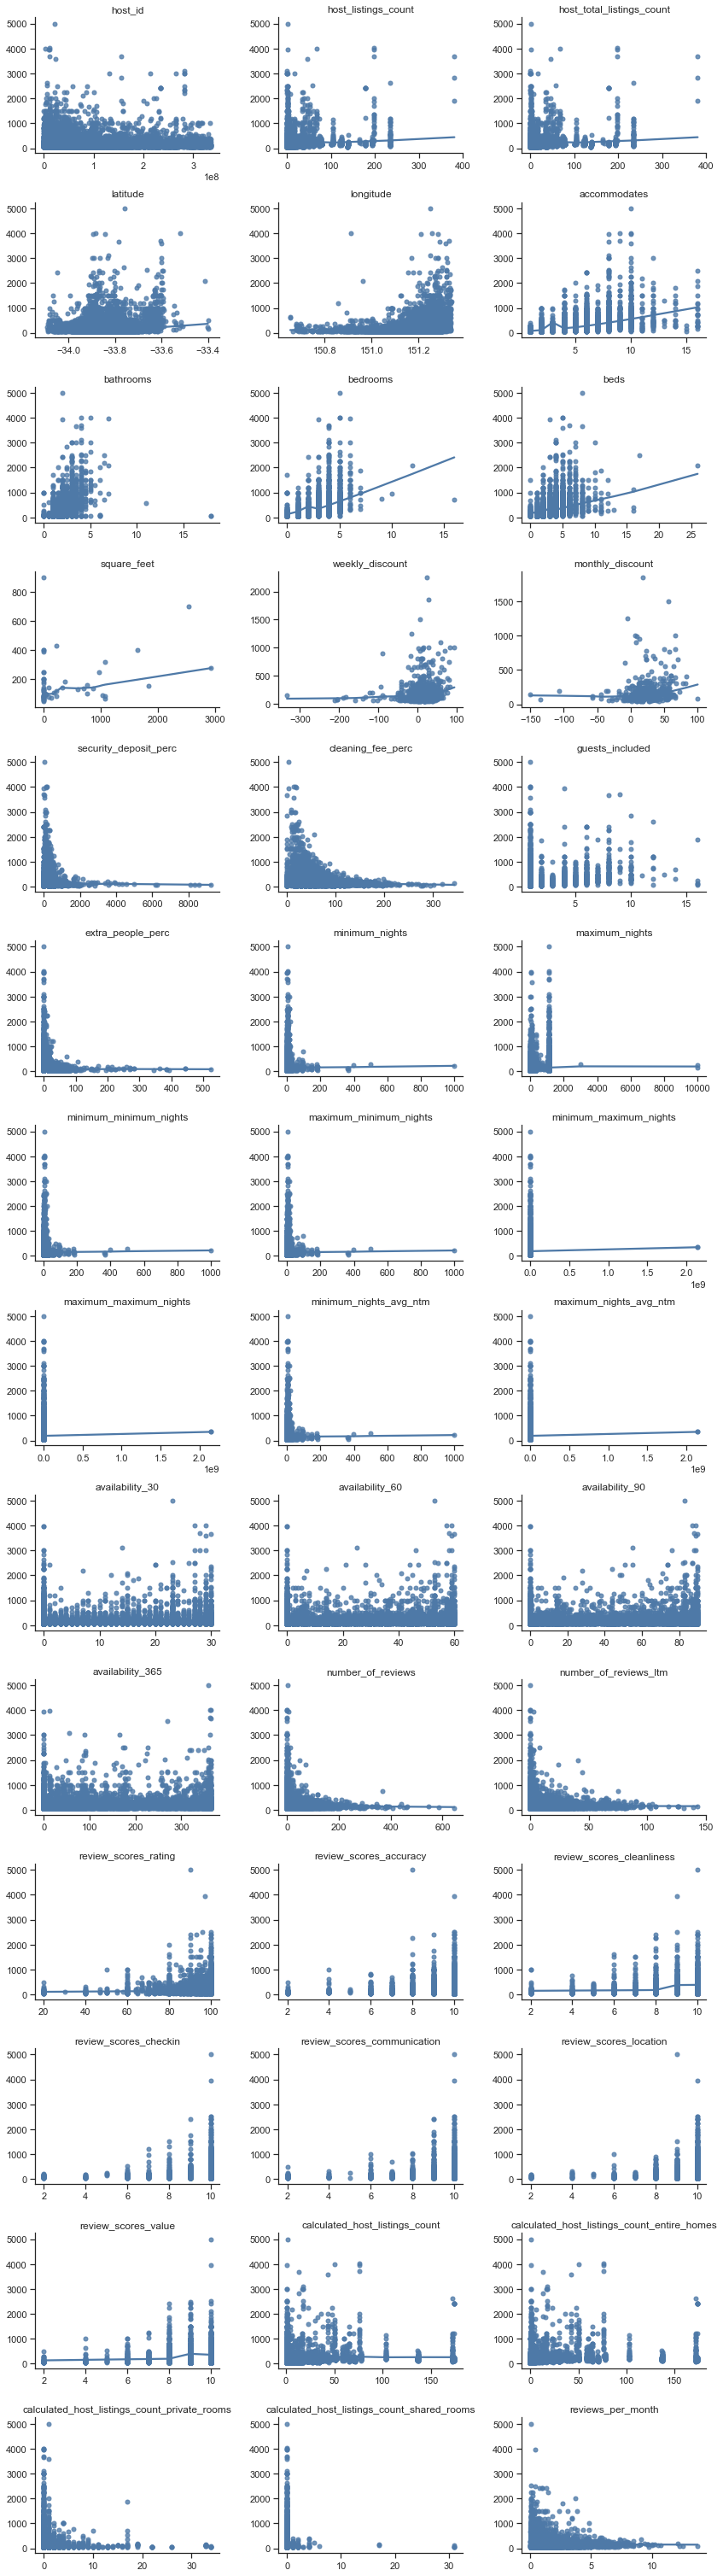

In [278]:
from statlearning import plot_regressions
plot_regressions(train_1[number_col], y_train, lowess=True)
plt.show(block=False)

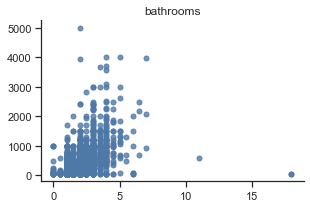

In [231]:
from statlearning import plot_regressions
plot_regressions(train[['bathrooms']], y_train, lowess=True)
plt.show()